In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:/AI_New/ANN/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

Total 10 thousand data points and 14 columns.

RowNumber CustomerID and surname are not useful, hence dropped

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values

In [11]:
df.duplicated().sum()

0

There is 0 duplicate.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Gender and Geography are object type so we want to convert into numerical form

In [13]:
# Lets us check how many customers have left the bank
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

7963 customers have left the bank

In [14]:
# Lets check how many customers are from which geography
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

There are less customers from spain, more from France

In [16]:
# Lets check how many males and how many females are there
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
# We have convert geography and Gender which is an object type convert int

In [18]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Here Geography france is droped and male column is dropped

In [22]:
# Assign all features to X and target column as y
# Divide the data into train and test
X=df.drop(columns=["Exited"])
y=df["Exited"].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

80% data used for training and 20% for testing

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [24]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
X_train.shape

(8000, 11)

There are 11 columns

In [27]:
# Lets us make uniform scaling of all features 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.fit_transform(X_test)

### Lets define ANN model

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model=Sequential()

model.add(Dense(3,activation="sigmoid",input_dim=11))

model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


There are 11 feartures and 3 links, 11*3=33 and 4 byes and + 3 links is 40 params

Params are weights

In [32]:
model.compile(optimizer='Adam',loss="binary_crossentropy")

binary_crossentropy is for classification 0 and 1

### Lets Train the model

In [33]:
history=model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10

250/250 [==============================] - 2s 3ms/step - loss: 0.6493
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5254
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4743
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4534
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4428
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4362
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4314
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4279
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4252
Epoch 10/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4230


In [34]:
# Now lets check final weights after training

In [35]:
model.layers[0].get_weights()

[array([[-0.01864689, -0.1666277 ,  0.25628623],
        [-0.67300975,  1.5703726 , -1.8660264 ],
        [ 0.03931436, -0.0725702 ,  0.16848466],
        [-0.4066638 , -0.06391317,  0.13485931],
        [ 0.01206926,  0.17935467,  1.423815  ],
        [-0.07170695, -0.0451343 ,  0.12522939],
        [ 1.0268272 , -0.34391096,  0.24591167],
        [-0.07971811, -0.09100414, -0.08427681],
        [-0.8341382 ,  0.41587225, -0.329884  ],
        [-0.12988168, -0.18753844, -0.23837496],
        [ 0.55763084, -0.32261875,  0.21830772]], dtype=float32),
 array([ 0.5681464 , -0.39483124,  0.9631148 ], dtype=float32)]

In [36]:
model.layers[1].get_weights()

[array([[-1.4892277 ],
        [ 0.9487816 ],
        [-0.95076805]], dtype=float32),
 array([-0.4683772], dtype=float32)]

last arry for bayes

In [ ]:
# There weights and 1 bias

In [37]:
y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 4ms/step


In [38]:
y_log

array([[0.23563428],
       [0.35059962],
       [0.16557501],
       ...,
       [0.14355192],
       [0.12744015],
       [0.21640386]], dtype=float32)

Because sigmoid output in Probabality, Result is in the form of Probability.

If the output is less than 0.5 the output 0. greater than 0.5 then 1 means customer will retain the bank 

In [40]:
y_pred=np.where(y_log>0.5,1,0)

In [41]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.818

### Lets increase number of nodes and layers also

In [44]:
model=Sequential()

model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu",input_dim=11))
# here added one more hidden layer

model.add(Dense(1,activation='sigmoid'))

In [45]:
# 11X11+11 bias , 11X11+11 bias , 11X1+1 bias =276

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


param means no. of weights

In [47]:
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy'])

In [48]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100

200/200 [==============================] - 3s 7ms/step - loss: 0.5581 - accuracy: 0.7195 - val_loss: 0.4705 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4533 - accuracy: 0.7977 - val_loss: 0.4539 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.8014 - val_loss: 0.4445 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.8080 - val_loss: 0.4367 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8167 - val_loss: 0.4251 - val_accuracy: 0.8188
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4004 - accuracy: 0.8309 - val_loss: 0.4112 - val_accuracy: 0.8256
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3837 - accuracy: 0.8423 - val_loss: 0.3966 - val_accuracy: 0.830

In [49]:
model.layers[0].get_weights()

[array([[-0.13317573, -0.34503758, -0.50585157,  0.13345869,  0.12729256,
          0.7297891 , -0.0237096 ,  0.09612825,  0.08398664, -0.29572257,
          0.10158812],
        [-0.46805698, -0.12227841, -0.13565029, -0.10213346, -0.3243428 ,
          0.25726455, -0.00564077, -0.9457105 ,  0.14899388, -0.14893802,
          0.66146684],
        [-0.35024008, -0.28088933, -0.40961188, -0.06023028, -0.1903987 ,
         -0.08868726, -0.07323895, -0.01600787, -0.09197584,  0.42388043,
         -0.0101824 ],
        [ 0.11471284, -0.6096463 , -0.16064812,  0.17015052, -0.7277483 ,
         -0.73230755,  0.7153583 ,  0.0374084 , -0.25726098, -0.8594811 ,
         -0.45377862],
        [ 0.14390717,  0.32494077,  0.49591476,  1.184661  , -1.0528297 ,
          0.02578762, -0.5344352 , -0.01742215, -0.5107414 ,  0.22769104,
         -0.21424958],
        [ 0.7238284 , -0.2676057 ,  0.49159142,  0.02994942,  0.16723718,
         -0.03862283,  0.2962513 ,  0.01863499, -0.13452679, -0.111844 

In [51]:
model.layers[2].get_weights()

[array([[ 0.76927346],
        [-1.0665364 ],
        [-0.81918395],
        [ 2.1694348 ],
        [ 0.9376182 ],
        [-0.7879079 ],
        [ 0.4649025 ],
        [ 0.8889175 ],
        [-0.75232106],
        [ 0.5955177 ],
        [ 0.62045884]], dtype=float32),
 array([-0.13008544], dtype=float32)]

In [59]:
y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 4ms/step


In [60]:
y_pred=np.where(y_log>0.5,1,0)

In [61]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

In [63]:
history.history

{'loss': [0.5581236481666565,
  0.45326656103134155,
  0.43867966532707214,
  0.4278590679168701,
  0.4153832495212555,
  0.40036383271217346,
  0.3837074935436249,
  0.3705148994922638,
  0.3625449240207672,
  0.35705867409706116,
  0.35360705852508545,
  0.3502940237522125,
  0.34780558943748474,
  0.34600669145584106,
  0.3436381220817566,
  0.3425367772579193,
  0.34099024534225464,
  0.33991318941116333,
  0.3380192816257477,
  0.33705782890319824,
  0.3358369767665863,
  0.33483174443244934,
  0.33445191383361816,
  0.3331163823604584,
  0.3326011896133423,
  0.3325832486152649,
  0.3314308524131775,
  0.33069610595703125,
  0.3306368291378021,
  0.33027294278144836,
  0.3295401632785797,
  0.3288973569869995,
  0.3283933997154236,
  0.3282449245452881,
  0.32763993740081787,
  0.327263742685318,
  0.32694894075393677,
  0.32705673575401306,
  0.32626399397850037,
  0.3262454569339752,
  0.32562899589538574,
  0.32574793696403503,
  0.32521820068359375,
  0.32513320446014404,
  0

In [67]:
import matplotlib.pyplot as plt

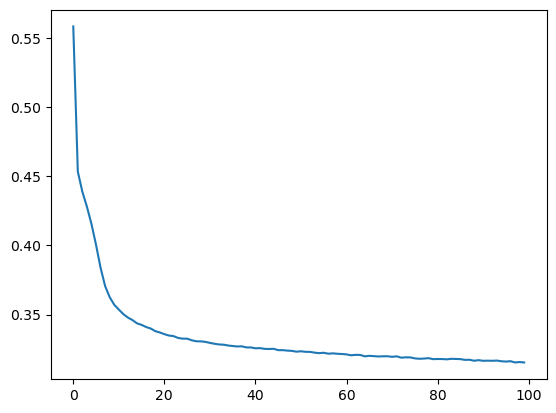

In [65]:
plt.plot(history.history["loss"])

Initially loss is higher and going to lower 

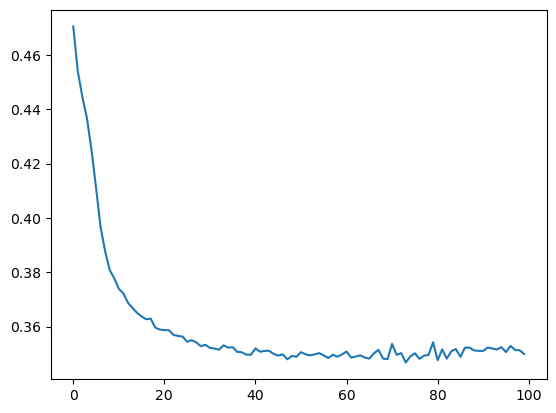

In [66]:
plt.plot(history.history['val_loss'])

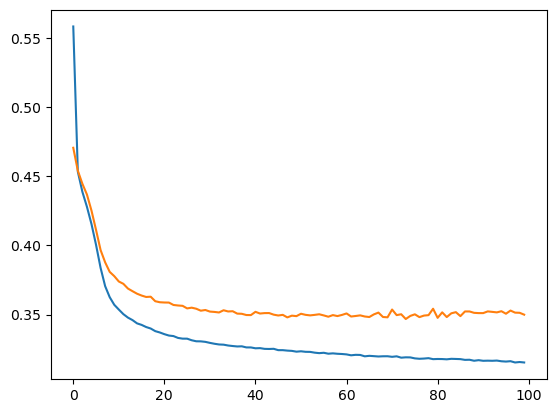

In [69]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])

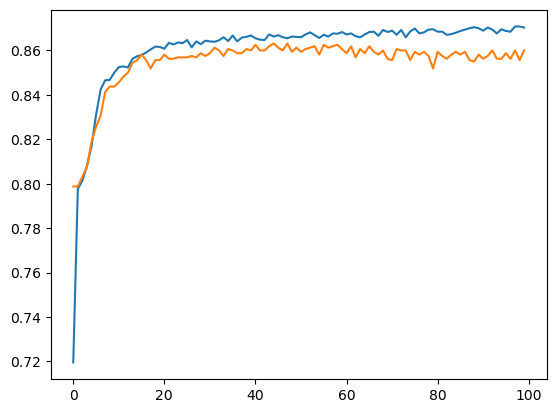

In [68]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])